# <center><b><h1>Female Patients No Menopause (Evaluation)</h1></b></center>

In [1]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import cos, sin, atan
import numpy as np
from operator import itemgetter
import pandas as pd
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix, precision_score, f1_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import spearmanr, pearsonr

## 1. Load the data

### 1.1 Validation and Test sets

In [2]:
df_X_test = pd.read_csv("../../../Data/female_patients_no_menopause/X_test.csv", index_col=0)
df_X_test.shape

(4899, 13)

In [3]:
df_y_test = pd.read_csv("../../../Data/female_patients_no_menopause/y_test.csv", index_col=0)
df_y_test.shape

(4899, 1)

In [4]:
df_X_val = pd.read_csv("../../../Data/female_patients_no_menopause/X_val.csv", index_col=0)
df_X_val.shape

(4899, 13)

In [5]:
df_y_val = pd.read_csv("../../../Data/female_patients_no_menopause/y_val.csv", index_col=0)
df_y_val.shape

(4899, 1)

### 1.2 Neural Network models

In [6]:
model_folder_base = '../../../Models/Neural_Networks/female_patients_no_menopause/'

#### Models trained with a Base Ratio of 0.5 between the classes

In [7]:
nn_05_fr = joblib.load(model_folder_base+'base_ratio_05/NeuralNetwork - Female_Patients_No_Menopause - First Run - Base Ratio 05_model.pkl')
nn_05_sr_05 = joblib.load(model_folder_base+'base_ratio_05/NeuralNetwork - Female_Patients_No_Menopause - Second Run - Ratio 05_original_val_model.pkl')
nn_05_sr_1 = joblib.load(model_folder_base+'base_ratio_05/NeuralNetwork - Female_Patients_No_Menopause - Second Run - Ratio 1_original_val_model.pkl')

#### Models trained with a Base Ratio of 1 between the classes

In [8]:
nn_1_fr = joblib.load(model_folder_base+'base_ratio_1/NeuralNetwork - Female_Patients_No_Menopause - First Run - Base Ratio 1_original_val_model.pkl')
nn_1_sr_05 = joblib.load(model_folder_base+'base_ratio_1/NeuralNetwork - Female_Patients_No_Menopause - Second Run - Ratio 05_original_val_model.pkl')
nn_1_sr_1 = joblib.load(model_folder_base+'base_ratio_1/NeuralNetwork - Female_Patients_No_Menopause - Second Run - Ratio 1_original_val_model.pkl')

## 2. Models Comparison

### 2.1 Computing the predictions

In [9]:
predictions_05_base = nn_05_fr.predict(df_X_val.values)
predictions_05_05= nn_05_sr_05.predict(df_X_val.values)
predictions_05_1 = nn_05_sr_1.predict(df_X_val.values)

predictions_1_base = nn_1_fr.predict(df_X_val.values)
predictions_1_05= nn_1_sr_05.predict(df_X_val.values)
predictions_1_1 = nn_1_sr_1.predict(df_X_val.values)

### 2.2 Store models' metrics and features in a list

In [10]:
nn_models = dict()

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions_05_base)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_val, predictions_05_base)
nn_models.update({'Base_05': {
                    'id' : 'Base_05',
                    'tn' : tn,
                    'fp' : fp,
                    'fn' : fn,
                    'tp' : tp,
                    'recall' : tp/(tp+fn),
                    'auc' : roc_auc_score(df_y_val, predictions_05_base),
                    'f1-score' : f1_score(df_y_val,predictions_05_base),
                    'precision' : tp / float(tp+fp),
                    'fpr' : fpr,
                    'tpr' : tpr,
                    'thresholds' : thresholds,
                    'model': nn_05_fr
                    }
                }
                )

In [12]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions_05_05)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_val, predictions_05_05)
nn_models.update({'Base_05_Ratio_05': {
                    'id' : 'Base_05_Ratio_05',
                    'tn' : tn,
                    'fp' : fp,
                    'fn' : fn,
                    'tp' : tp,
                    'recall' : tp/(tp+fn),
                    'auc' : roc_auc_score(df_y_val, predictions_05_05),
                    'f1-score' : f1_score(df_y_val,predictions_05_05),
                    'precision' : tp / float(tp+fp),
                    'fpr' : fpr,
                    'tpr' : tpr,
                    'thresholds' : thresholds,
                    'model': nn_05_sr_05
                    }
                }
                )

In [13]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions_05_1)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_val, predictions_05_1)
nn_models.update({'Base_05_Ratio_1': {
                    'id' : 'Base_05_Ratio_1',
                    'tn' : tn,
                    'fp' : fp,
                    'fn' : fn,
                    'tp' : tp,
                    'recall' : tp/(tp+fn),
                    'auc' : roc_auc_score(df_y_val, predictions_05_1),
                    'f1-score' : f1_score(df_y_val,predictions_05_1),
                    'precision' : tp / float(tp+fp),
                    'fpr' : fpr,
                    'tpr' : tpr,
                    'thresholds' : thresholds,
                    'model': nn_05_sr_1
                    }
                }
                )

In [14]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions_1_base)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_val, predictions_1_base)
nn_models.update({'Base_1': {
                    'id' : 'Base_1',
                    'tn' : tn,
                    'fp' : fp,
                    'fn' : fn,
                    'tp' : tp,
                    'recall' : tp/(tp+fn),
                    'auc' : roc_auc_score(df_y_val, predictions_1_base),
                    'f1-score' : f1_score(df_y_val,predictions_1_base),
                    'precision' : tp / float(tp+fp),
                    'fpr' : fpr,
                    'tpr' : tpr,
                    'thresholds' : thresholds,
                    'model': nn_1_fr
                    }
                }
                )

In [15]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions_1_05)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_val, predictions_1_05)
nn_models.update({'Base_1_Ratio_05': {
                    'id' : 'Base_1_Ratio_05',
                    'tn' : tn,
                    'fp' : fp,
                    'fn' : fn,
                    'tp' : tp,
                    'recall' : tp/(tp+fn),
                    'auc' : roc_auc_score(df_y_val, predictions_1_05),
                    'f1-score' : f1_score(df_y_val,predictions_1_05),
                    'precision' : tp / float(tp+fp),
                    'fpr' : fpr,
                    'tpr' : tpr,
                    'thresholds' : thresholds,
                    'model': nn_1_sr_05
                    }
                }
                )

In [16]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions_1_1)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_val, predictions_1_1)
nn_models.update({'Base_1_Ratio_1': {
                    'id' : 'Base_1_Ratio_1',
                    'tn' : tn,
                    'fp' : fp,
                    'fn' : fn,
                    'tp' : tp,
                    'recall' : tp/(tp+fn),
                    'auc' : roc_auc_score(df_y_val, predictions_1_1),
                    'f1-score' : f1_score(df_y_val,predictions_1_1),
                    'precision' : tp / float(tp+fp),
                    'fpr' : fpr,
                    'tpr' : tpr,
                    'thresholds' : thresholds,
                    'model': nn_1_sr_1
                    }
                }
                )

### 2.3 Resume table of models' metrics and features

In [17]:
nn_models_df = pd.DataFrame(nn_models).transpose()
nn_models_df = nn_models_df[['tn', 'fp', 'fn', 'tp', 'recall', 'auc', 'f1-score', 'precision', 'fpr', 'tpr', 'thresholds','model']]

In [18]:
nn_models_df

,tn,fp,fn,tp,recall,auc,f1-score,precision,fpr,tpr,thresholds,model
Base_05,3378,1514,1,6,0.857143,0.773829,0.00785855,0.00394737,"[0.0, 0.3094848732624693, 1.0]","[0.0, 0.8571428571428571, 1.0]","[2, 1, 0]","MLPClassifier(activation='relu', alpha=0.0001,..."
Base_05_Ratio_05,3105,1787,0,7,1,0.817355,0.00777346,0.0039019,"[0.0, 0.3652902698282911, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]","MLPClassifier(activation='relu', alpha=0.0001,..."
Base_05_Ratio_1,2781,2111,0,7,1,0.78424,0.00658824,0.003305,"[0.0, 0.4315208503679477, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]","MLPClassifier(activation='relu', alpha=0.0001,..."
Base_1,2797,2095,0,7,1,0.785875,0.00663822,0.00333016,"[0.0, 0.42825020441537204, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]","MLPClassifier(activation='relu', alpha=0.0001,..."
Base_1_Ratio_05,2787,2105,0,7,1,0.784853,0.00660689,0.00331439,"[0.0, 0.4302943581357318, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]","MLPClassifier(activation='relu', alpha=0.0001,..."
Base_1_Ratio_1,2441,2451,0,7,1,0.749489,0.00567951,0.00284784,"[0.0, 0.5010220768601799, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]","MLPClassifier(activation='relu', alpha=0.0001,..."


### 2.4 ROC curves comparison

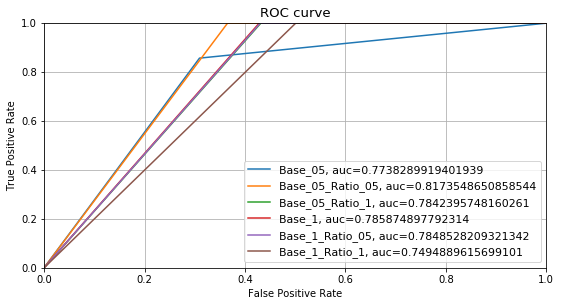

In [19]:
plt.figure(figsize=(9,4.5))
for name,model in nn_models_df.iterrows():
    plt.plot(model.loc['fpr'], model.loc['tpr'], label=name+", auc="+str(model.loc['auc']))
    plt.legend(loc=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 11
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.savefig('Female_Patients_No_Menopause_validation_roc.png')

### 2.5 Best model selection

In [20]:
nn_models = sorted(nn_models.values(), key=itemgetter('auc'), reverse=True)

In [21]:
best_nn_model = nn_models[0]['model']

In [22]:
best_predictions = best_nn_model.predict(df_X_val.values)

## 3. Best model testing and metrics visualization

### 3.1 Classification Report 

In [23]:
class_repo = classification_report(df_y_test['Class'].values,best_predictions,target_names=['Non-Fracture','Fracture'], output_dict=True)
class_repo = pd.DataFrame(class_repo).transpose()

In [24]:
class_repo

,f1-score,precision,recall,support
Non-Fracture,0.776000,0.999678,0.634116,4895.0
Fracture,0.003337,0.001672,0.750000,4.0
micro avg,0.634211,0.634211,0.634211,4899.0
macro avg,0.389669,0.500675,0.692058,4899.0
weighted avg,0.775369,0.998863,0.634211,4899.0


### 3.2 Confusion Matrix

In [25]:
conf_mat_base_folder = '../../../Data/confusion_matrix/neural_network/best_model_based/'

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
pred_test = best_nn_model.predict(df_X_test.values)

In [28]:
conf_mat = confusion_matrix(df_y_test['Class'].values,pred_test)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_test['Class'].values,pred_test)

In [29]:
conf_mat_df = pd.DataFrame([list(pd.Series([tn, fp, fn, tp]))],columns=['tn', 'fp', 'fn', 'tp'])
conf_mat_df.columns.names = ['model']
conf_mat_df.rename(index={0: 'Female_Patients_No_Menopause'},inplace=True)
conf_mat_df

model,tn,fp,fn,tp
Female_Patients_No_Menopause,3110,1785,0,4


Confusion matrix
[[3110 1785]
 [   0    4]]
Normalized confusion matrix
[[0.64 0.36]
 [0.   1.  ]]


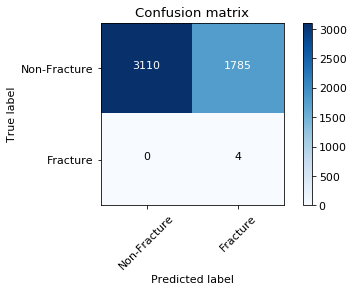

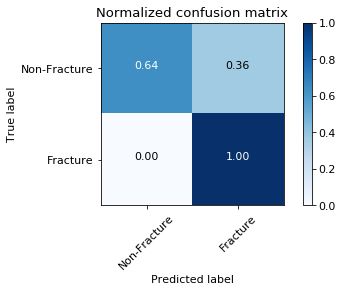

In [30]:
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"],
                      title='Confusion matrix')
plt.savefig(conf_mat_base_folder+'Female_Patients_No_Menopause_Best_nn_model_testset_confusion_matrix.png', bbox_inches="tight")

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"], normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(conf_mat_base_folder+'Female_Patients_No_Menopause_Best_nn_model_testset_confusion_matrix_normalized.png', bbox_inches="tight")
plt.show()

### 3.3 ROC Curve and AUC

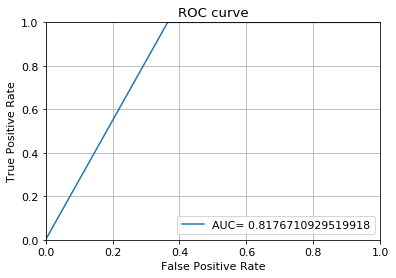

In [31]:
plt.plot(fpr,tpr, label = "AUC= "+str(roc_auc_score(df_y_test,pred_test)))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 11
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.savefig('Female_Patients_No_Menopause_Best_ROC.png')

### 3.4 Accuracy

In [32]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.6356399265156154


### 3.5 Recall (or Sensitivity)

In [33]:
recall = tp/(tp+fn)
print("Recall : ", recall)
#recall_score(df_y_test, pred_test)

Recall :  1.0


### 3.6 Classification Error

In [34]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.3643600734843846


### 3.7 Specificity

In [35]:
specificity = tn / (tn+fp)

print(specificity)

0.6353421859039836


### 3.8 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

# CONTROLLARE

In [36]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
#print(1 - specificity)

0.36465781409601633


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [37]:
precision = tp / float(tp+fp)

print(precision)

0.0022358859698155395


## 6. Neural Network Visualization

In [38]:
nn_model_base_folder = '../../../Models/Neural_Networks/best_models/'

In [39]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        n_neurons = 0
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            n_neurons += 1
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType)+" - "+str(n_neurons)+" neurons", fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure(figsize=(38,8), dpi=300)
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.savefig(nn_model_base_folder+'Female_Patients_No_Menopause_structure.png', bbox_inches="tight")
        plt.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

In [40]:
n_output = 1
nn_structure = []
nn_structure.append(df_X_test.shape[1])
for layer in best_nn_model.hidden_layer_sizes:
    nn_structure.append(layer)
nn_structure.append(n_output)

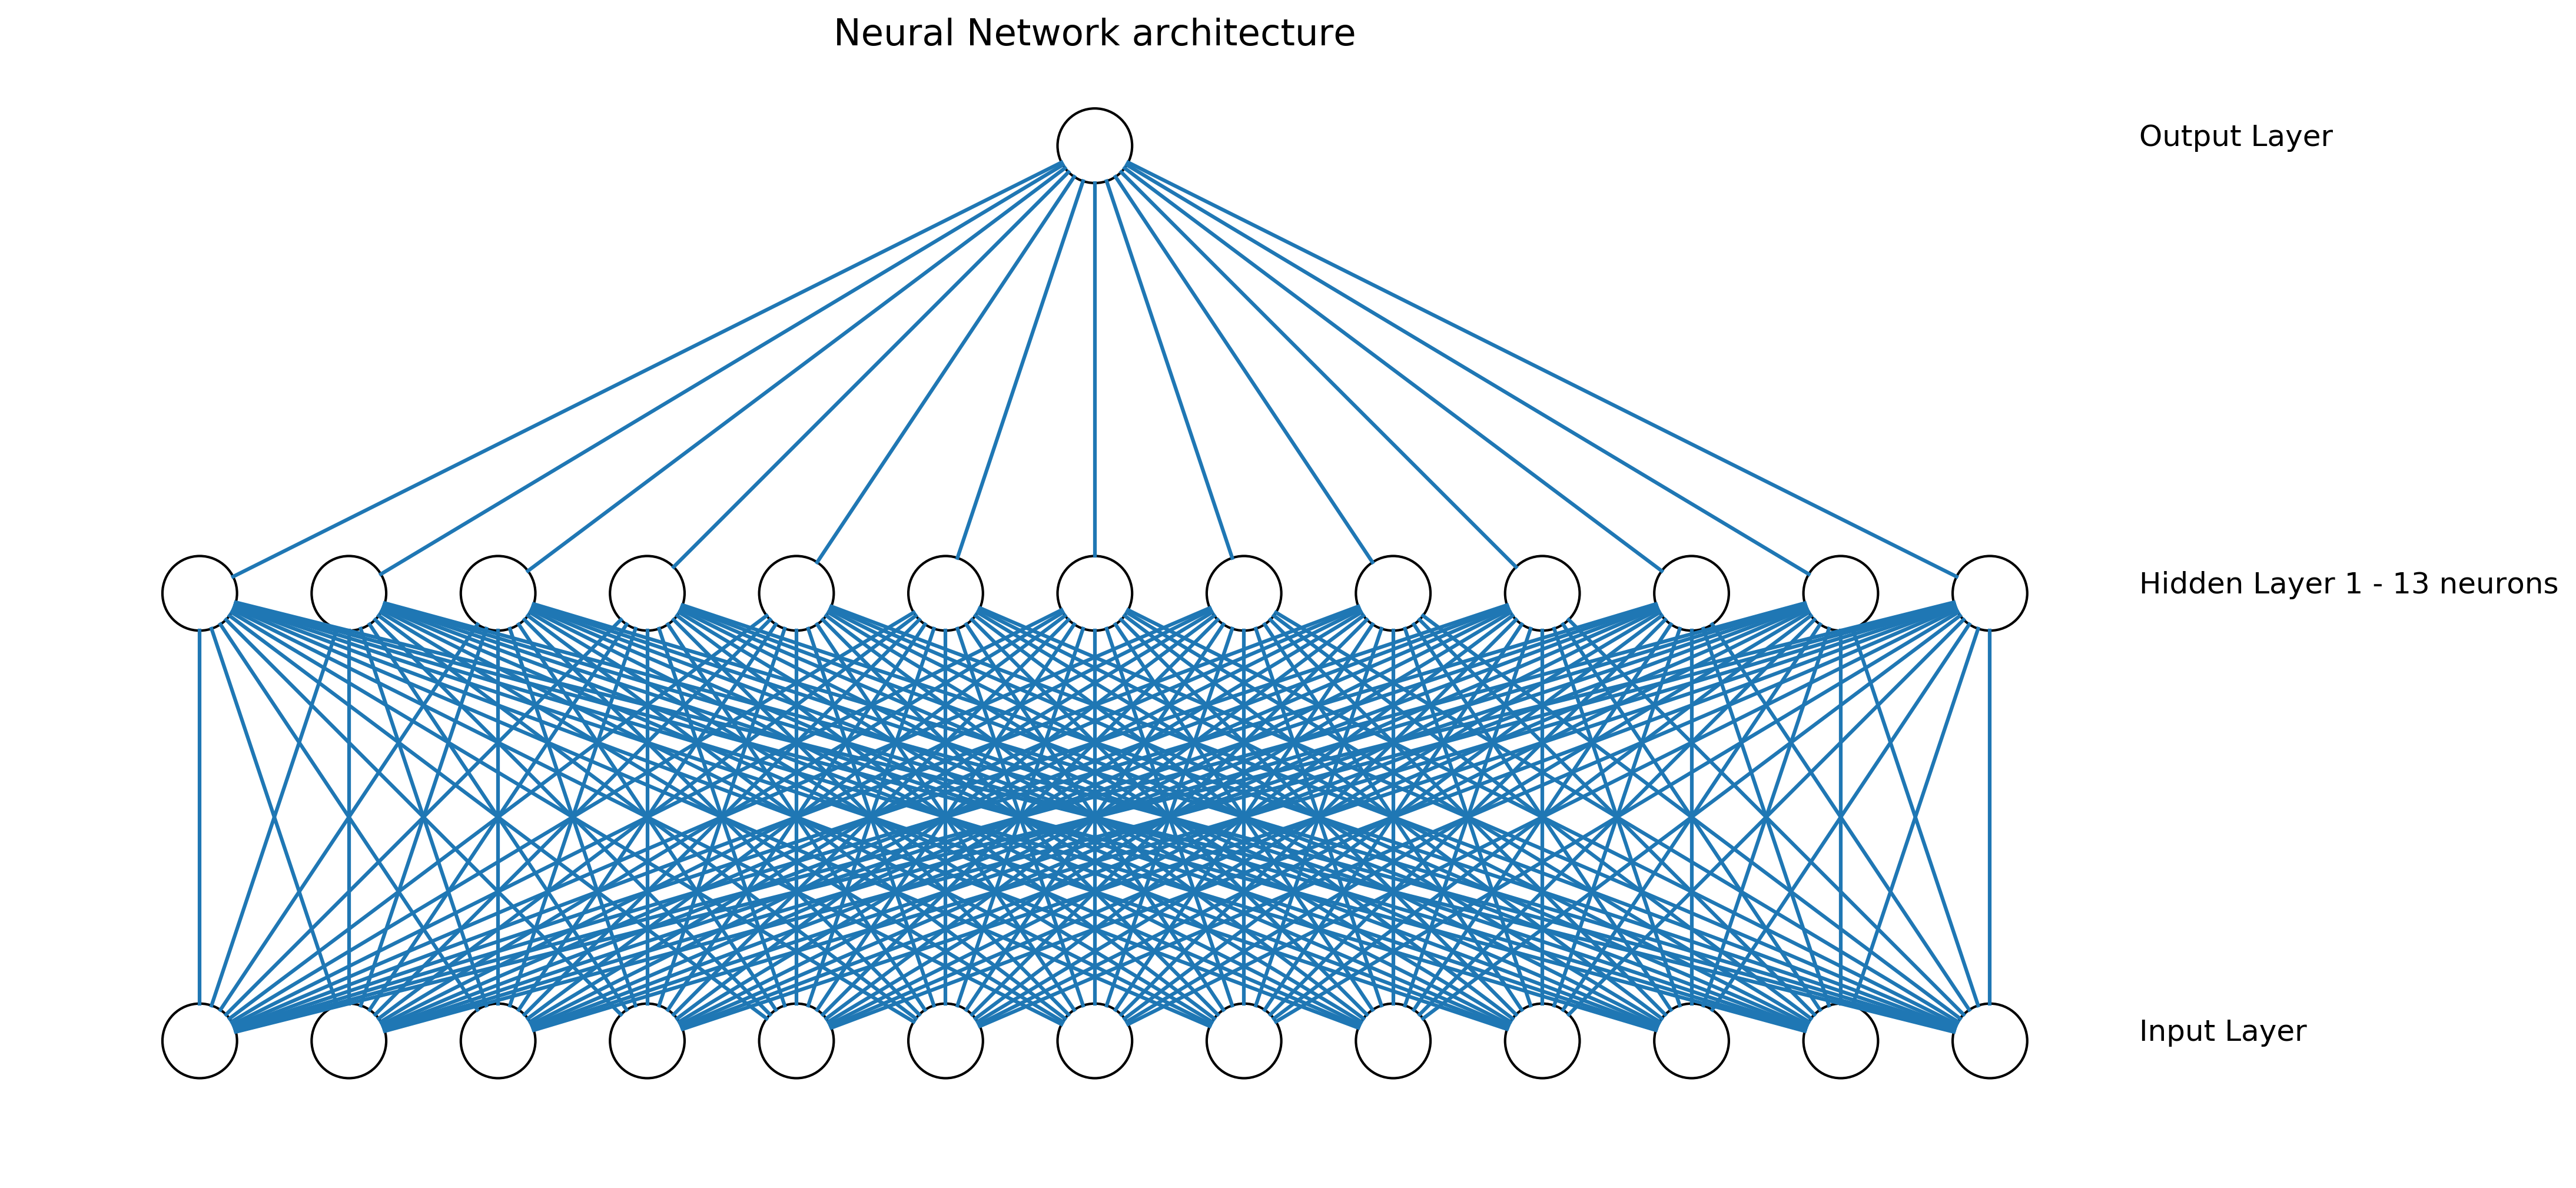

In [41]:
neural_network = DrawNN( nn_structure )
neural_network.draw()

## 7. Save best model to file

In [42]:
joblib.dump(best_nn_model, nn_model_base_folder+'Female_Patients_No_Menopause_Model.pkl')
conf_mat_df.to_csv(conf_mat_base_folder+'Female_Patients_No_Menopause.csv')